Introdução do problema a ser resolvido:

--- Xxx----------

Dicionário dos dados:

data_iniSE: primeiro dia da semana epidemiológica (domingo);

SE: epidemiological week;

casos_est: Número estimado de casos por semana utilizando o modelo nowcasting (nota: Os valores são atualizados retrospectivamente todas as semanas);

casos_est_min e casos_est_max: 95% credibility interval of the estimated number of cases;

casos: Número de casos notificados por semana (Os valores são atualizados retrospectivamente todas as semanas);

p_rt1: Probabilidade de (Rt>1). Para emissão do alerta laranja utilizamos o critério p_rt1 > 0,95 por 3 semanas ou mais;

p_inc100k: Taxa de incidência estimada por 100 mil;

Localidade_id: Divisão submunicipal (atualmente implementada apenas no Rio de Janeiro);

nivel: Nível de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho);

id: Índice numérico;

versao_modelo: Model version (internal use);

Rt: Estimativa pontual do número reprodutivo de casos, veja (Saiba mais);

pop: população estimada (IBGE);

tempmin: média das temperaturas mínimas diárias ao longo da semana;

umidmax: média da umidade relativa do ar máxima diária ao longo da semana;

receptivo: indica receptividade climática, ou seja, condições para alta capacidade vetorial. 0 = desfavorável, 1 = favorável, 2 = favorável nesta semana e na semana passada, 3 = favorável durante pelo menos três semanas (suficiente para completar um ciclo de transmissão);

transmissão: evidência de transmissão sustentada: 0 = nenhuma evidência, 1 = possível, 2 = provável, 3 = altamente provável;

nivel_inc: Incidência estimada abaixo do limiar pré-epidêmico, 1 = acima do limiar pré-epidêmico, mas abaixo do limiar epidêmico, 2 = acima do limiar epidêmico;

notif_accum_year: número acumulado de casos por ano;

API DENGUE
Infodengue's tables have data aggregated by week, provided by different sources. They could be consulted by a form, or directly from Python, via consult of an API. This functionality is available via the URL: https://info.dengue.mat.br/api/alertcity?params: must contain the following parameters:

geocode: city's IBGE code

disease: desease type to be consulted (str:dengue|chikungunya|zika)

format: file extension/format (str:json|csv)

ew_start: epidemiological week initial consultation (int:1-53)

ew_end: epidemiological week final consultation (int:1-53)

ey_start: year of initial consultation (int:0-9999)

ey_end: year of final consultation (int:0-9999)



In [350]:
#Importando a biblioteca

import pandas as pd
import numpy as np
# Importação de pacotes
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import mysql.connector
from mysql.connector import Error
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


In [351]:
# Consumunindo API - Rio de Janeiro

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3304557 # Rio de Janeiro
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp = "?".join([url, params])

#Transformando o dataset em um dataframe
df_rio = pd.read_csv(url_resp, index_col='SE')

#Criando uma nova coluna vinculando a cidade
#Assim cada consumo da API ja vai identificada 

#Rio de Janeiro
df_rio['cidade'] = 0

#Exibindo o dataframe
df_rio.head()

#url_resp

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,9016.5,5286,NaN,2847,0.0,136.08067,0,4,330455720241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,311767,0
202411,2024-03-10,9840.0,8629,NaN,7396,0.0,148.50928,0,4,330455720241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,311767,0
202410,2024-03-03,11353.0,10767,NaN,10004,0.0,171.34409,0,4,330455720241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,311767,0
202409,2024-02-25,13582.0,13193,NaN,12614,1.0,204.98505,0,4,330455720240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,311767,0
202408,2024-02-18,15608.0,15303,NaN,14892,1.0,235.56227,0,4,330455720240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,311767,0


In [352]:
df_dados_03.umidmed.head()

data_iniSE
2024-03-17    81.475562
2024-03-10    79.754393
2024-03-03    79.479606
2024-02-25    78.586575
2024-02-18    83.101152
Name: umidmed, dtype: float64

In [353]:
df_rio.shape

(586, 30)

In [354]:
# Consumunindo API - Duque de Caxias

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3301702 # Duque de Caxias
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_dqc = "?".join([url, params])

#Transformando o dataset em um dataframe
df_caxias = pd.read_csv(url_resp_dqc, index_col='SE')

#Adicionando nova coluna

#Duque de Caxias
df_caxias['cidade'] = 1

#Exibindo o dataframe

df_caxias.head()
#url_resp

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,1471.5,285,5490,25,1.000000,187.979300,0,4,330170220241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,18141,1
202411,2024-03-10,903.0,307,2800,105,1.000000,115.355286,0,4,330170220241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,18141,1
202410,2024-03-03,595.0,329,1433,219,0.058860,76.009290,0,4,330170220241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,18141,1
202409,2024-02-25,583.0,452,919,396,0.258089,74.476330,0,4,330170220240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,18141,1
202408,2024-02-18,724.0,656,903,633,1.000000,92.488625,0,4,330170220240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,18141,1


In [355]:
# Consumunindo API - São João de Meriti

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3305109 # São João de Meriti
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_sjm = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_sjm = pd.read_csv(url_resp_sjm, index_col='SE')

#Adicionando nova coluna

#São João de Meriti
df_sjm['cidade'] = 2

# Exibindo do dataframe
df_sjm.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,1334.5,182,8466,14,1.0,338.90085,0,4,330510920241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,8903,2
202411,2024-03-10,945.5,241,4551,121,1.0,240.11296,0,4,330510920241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,8903,2
202410,2024-03-03,715.5,347,2356,262,1.0,181.70367,0,4,330510920241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,8903,2
202409,2024-02-25,593.5,393,1433,354,1.0,150.72136,0,4,330510920240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,8903,2
202408,2024-02-18,508.0,402,896,386,1.0,129.00833,0,4,330510920240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,8903,2


In [356]:
# Consumunindo API - Niteroi

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303302 # Niteroi
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nit = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_niteroi = pd.read_csv(url_resp_nit, index_col='SE')

#Adicionando uma nova coluna

#Niteroi
df_niteroi['cidade'] = 3

#Exibindo o dataframe

df_niteroi.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,360.0,38,1927,1,0.988445,68.746370,0,4,330330220241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,24604,3
202411,2024-03-10,306.0,64,1332,13,0.406249,58.434418,0,4,330330220241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,24604,3
202410,2024-03-03,279.0,125,831,69,0.054469,53.278440,0,4,330330220241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,24604,3
202409,2024-02-25,318.0,224,601,185,0.884817,60.725964,0,4,330330220240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,24604,3
202408,2024-02-18,342.0,282,485,259,1.000000,65.309050,0,4,330330220240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,24604,3


In [357]:
# Consumunindo API - Nova Iguaçu

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303500 # Nova Iguaçu
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nvi = "?".join([url, params])

#Transformando o dataset em dataframe
df_nova_iguacu = pd.read_csv(url_resp_nvi, index_col='SE')

#Adicionando uma nova coluna
#Nova iguacu
df_nova_iguacu['cidade'] = 4

#url_resp

In [358]:
df_nova_iguacu.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,2.0,0,57,0,0.005818,0.244160,0,2,330350020241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,14279,4
202411,2024-03-10,5.0,1,82,1,0.000013,0.610401,0,2,330350020241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,14279,4
202410,2024-03-03,7.0,0,66,0,0.000000,0.854561,0,2,330350020241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,14279,4
202409,2024-02-25,12.0,1,72,1,0.000000,1.464962,0,2,330350020240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,14279,4
202408,2024-02-18,40.0,26,120,25,0.000000,4.883206,0,4,330350020240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,14279,4


In [359]:
# Consumunindo API - Nilopolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303203 # Nilopolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_niteroi = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_niteroi['cidade'] = 5

#Exibindo o dataframe
df_niteroi.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,7.0,0,33,0,0.368549,4.657941,0,2,330320320241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,858,5
202411,2024-03-10,5.0,1,21,1,0.257797,3.327100,0,3,330320320241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,858,5
202410,2024-03-03,11.0,9,20,9,0.957362,7.319621,0,3,330320320241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,858,5
202409,2024-02-25,9.0,8,13,8,0.960726,5.988781,0,2,330320320240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,858,5
202408,2024-02-18,2.0,2,4,2,0.336053,1.330840,0,2,330320320240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,858,5


In [360]:
# Consumunindo API - Petropolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303906 # Petropolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_petropolis = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_petropolis['cidade'] = 6

#Exibindo o dataframe
df_petropolis.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,230.0,15,1821,0,3.719322e-01,75.46972,0,2,330390620241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,4919,6
202411,2024-03-10,248.5,30,1668,0,7.405042e-02,81.54011,0,2,330390620241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,4919,6
202410,2024-03-03,198.0,36,973,1,3.820200e-10,64.96958,0,4,330390620241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,4919,6
202409,2024-02-25,258.0,152,615,117,1.370844e-04,84.65733,0,4,330390620240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,4919,6
202408,2024-02-18,396.0,327,625,308,9.998627e-01,129.93916,0,4,330390620240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,4919,6


In [361]:
# Consumunindo API - Teresopolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3305802 # Teresopolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_teresopolis = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_teresopolis['cidade'] = 7

#Exibindo o dataframe
df_teresopolis.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,214.0,23,1468,3,0.972865,113.205950,0,4,330580220241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,1877,7
202411,2024-03-10,207.0,67,929,48,0.998099,109.502950,0,4,330580220241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,1877,7
202410,2024-03-03,171.0,81,588,65,0.993091,90.458960,0,4,330580220241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,1877,7
202409,2024-02-25,163.0,96,412,91,0.999603,86.226960,0,4,330580220240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,1877,7
202408,2024-02-18,115.0,76,293,74,0.986469,60.834972,0,4,330580220240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,1877,7


In [362]:
# Consumunindo API - Nova Friburgo

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303401 # Nova Friburgo
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_novafriburgo = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna
#'Nilopolis'
df_novafriburgo['cidade'] = 8

#Exibindo o dataframe
df_novafriburgo.head()

#url_resp


,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,80.0,8,824,0,9.575333e-05,39.095905,0,4,330340120241219809,...,80.291000,27.466667,28.000000,NaN,NaN,NaN,NaN,NaN,19014,8
202411,2024-03-10,79.0,24,560,13,2.775113e-12,38.607210,0,4,330340120241119809,...,82.492435,26.451613,26.677419,NaN,NaN,NaN,NaN,NaN,19014,8
202410,2024-03-03,131.0,92,329,83,1.278394e-09,64.019550,0,4,330340120241019809,...,86.562615,25.853448,26.068966,NaN,NaN,NaN,NaN,NaN,19014,8
202409,2024-02-25,173.0,154,225,147,4.922017e-06,84.544900,0,4,330340120240919809,...,83.276943,26.483871,26.677419,NaN,NaN,NaN,NaN,NaN,19014,8
202408,2024-02-18,284.0,272,312,267,9.409139e-01,138.790470,0,4,330340120240819809,...,84.224434,26.224138,26.517241,NaN,NaN,NaN,NaN,NaN,19014,8


In [363]:
#Concatenando os dataframe em apenas 1

df_dados = pd.concat([df_caxias,df_niteroi,df_rio,df_sjm,df_nova_iguacu,df_novafriburgo,df_petropolis,df_teresopolis])

df_dados.to_csv('./bronze/dados_brutos.csv', encoding='UTF-8', index=False)
                
#Exibindo o dataframe

df_dados.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202412,2024-03-17,1471.5,285,5490.0,25,1.000000,187.979300,0,4,330170220241219809,...,80.067290,27.100000,27.400000,NaN,NaN,NaN,NaN,NaN,18141,1
202411,2024-03-10,903.0,307,2800.0,105,1.000000,115.355286,0,4,330170220241119809,...,79.413152,25.977273,26.045455,NaN,NaN,NaN,NaN,NaN,18141,1
202410,2024-03-03,595.0,329,1433.0,219,0.058860,76.009290,0,4,330170220241019809,...,77.073524,25.798246,26.210526,NaN,NaN,NaN,NaN,NaN,18141,1
202409,2024-02-25,583.0,452,919.0,396,0.258089,74.476330,0,4,330170220240919809,...,76.934153,27.285714,27.571429,NaN,NaN,NaN,NaN,NaN,18141,1
202408,2024-02-18,724.0,656,903.0,633,1.000000,92.488625,0,4,330170220240819809,...,82.184083,26.007936,26.095238,NaN,NaN,NaN,NaN,NaN,18141,1


In [364]:
#Verificando a dimensão do dataframe
df_dados.shape

(4688, 30)

In [365]:
#VErificando se possui todas as cidades consumidas

df_dados['cidade'].unique()

array([1, 5, 0, 2, 4, 8, 6, 7], dtype=int64)

In [366]:
#Verificando as informações

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4688 entries, 202412 to 201301
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_iniSE        4688 non-null   object 
 1   casos_est         4688 non-null   float64
 2   casos_est_min     4688 non-null   int64  
 3   casos_est_max     4681 non-null   float64
 4   casos             4688 non-null   int64  
 5   p_rt1             4688 non-null   float64
 6   p_inc100k         4688 non-null   float64
 7   Localidade_id     4688 non-null   int64  
 8   nivel             4688 non-null   int64  
 9   id                4688 non-null   int64  
 10  versao_modelo     4688 non-null   object 
 11  tweet             4688 non-null   float64
 12  Rt                4688 non-null   float64
 13  pop               4688 non-null   float64
 14  tempmin           4688 non-null   float64
 15  umidmax           4533 non-null   float64
 16  receptivo         4688 non-null   i

In [367]:
#Excluíndo as colunas que estão nulas e que não irei utilizar

df_dados_01 = df_dados.drop(['casprov','casprov_est','casprov_est_min','casprov_est_max','casconf','versao_modelo','id','tweet','Localidade_id'],axis=1)



In [368]:
df_dados_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4688 entries, 202412 to 201301
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_iniSE        4688 non-null   object 
 1   casos_est         4688 non-null   float64
 2   casos_est_min     4688 non-null   int64  
 3   casos_est_max     4681 non-null   float64
 4   casos             4688 non-null   int64  
 5   p_rt1             4688 non-null   float64
 6   p_inc100k         4688 non-null   float64
 7   nivel             4688 non-null   int64  
 8   Rt                4688 non-null   float64
 9   pop               4688 non-null   float64
 10  tempmin           4688 non-null   float64
 11  umidmax           4533 non-null   float64
 12  receptivo         4688 non-null   int64  
 13  transmissao       4688 non-null   int64  
 14  nivel_inc         4688 non-null   int64  
 15  umidmed           4533 non-null   float64
 16  umidmin           4533 non-null   f

In [369]:
#Verificar os missings que existem

df_dados_01.isnull().sum()

data_iniSE            0
casos_est             0
casos_est_min         0
casos_est_max         7
casos                 0
p_rt1                 0
p_inc100k             0
nivel                 0
Rt                    0
pop                   0
tempmin               0
umidmax             155
receptivo             0
transmissao           0
nivel_inc             0
umidmed             155
umidmin             155
tempmed             155
tempmax             155
notif_accum_year      0
cidade                0
dtype: int64

In [370]:
#filtrando os valores nulos para entender 
df_dados_02 = df_dados_01.dropna()

df_dados_02.isnull().sum()

data_iniSE          0
casos_est           0
casos_est_min       0
casos_est_max       0
casos               0
p_rt1               0
p_inc100k           0
nivel               0
Rt                  0
pop                 0
tempmin             0
umidmax             0
receptivo           0
transmissao         0
nivel_inc           0
umidmed             0
umidmin             0
tempmed             0
tempmax             0
notif_accum_year    0
cidade              0
dtype: int64

In [371]:
df_dados_02.shape

(4526, 21)

array([[<AxesSubplot:title={'center':'casos_est'}>,
        <AxesSubplot:title={'center':'casos_est_min'}>,
        <AxesSubplot:title={'center':'casos_est_max'}>,
        <AxesSubplot:title={'center':'casos'}>],
       [<AxesSubplot:title={'center':'p_rt1'}>,
        <AxesSubplot:title={'center':'p_inc100k'}>,
        <AxesSubplot:title={'center':'nivel'}>,
        <AxesSubplot:title={'center':'Rt'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'tempmin'}>,
        <AxesSubplot:title={'center':'umidmax'}>,
        <AxesSubplot:title={'center':'receptivo'}>],
       [<AxesSubplot:title={'center':'transmissao'}>,
        <AxesSubplot:title={'center':'nivel_inc'}>,
        <AxesSubplot:title={'center':'umidmed'}>,
        <AxesSubplot:title={'center':'umidmin'}>],
       [<AxesSubplot:title={'center':'tempmed'}>,
        <AxesSubplot:title={'center':'tempmax'}>,
        <AxesSubplot:title={'center':'notif_accum_year'}>,
        <AxesSubplot:title={

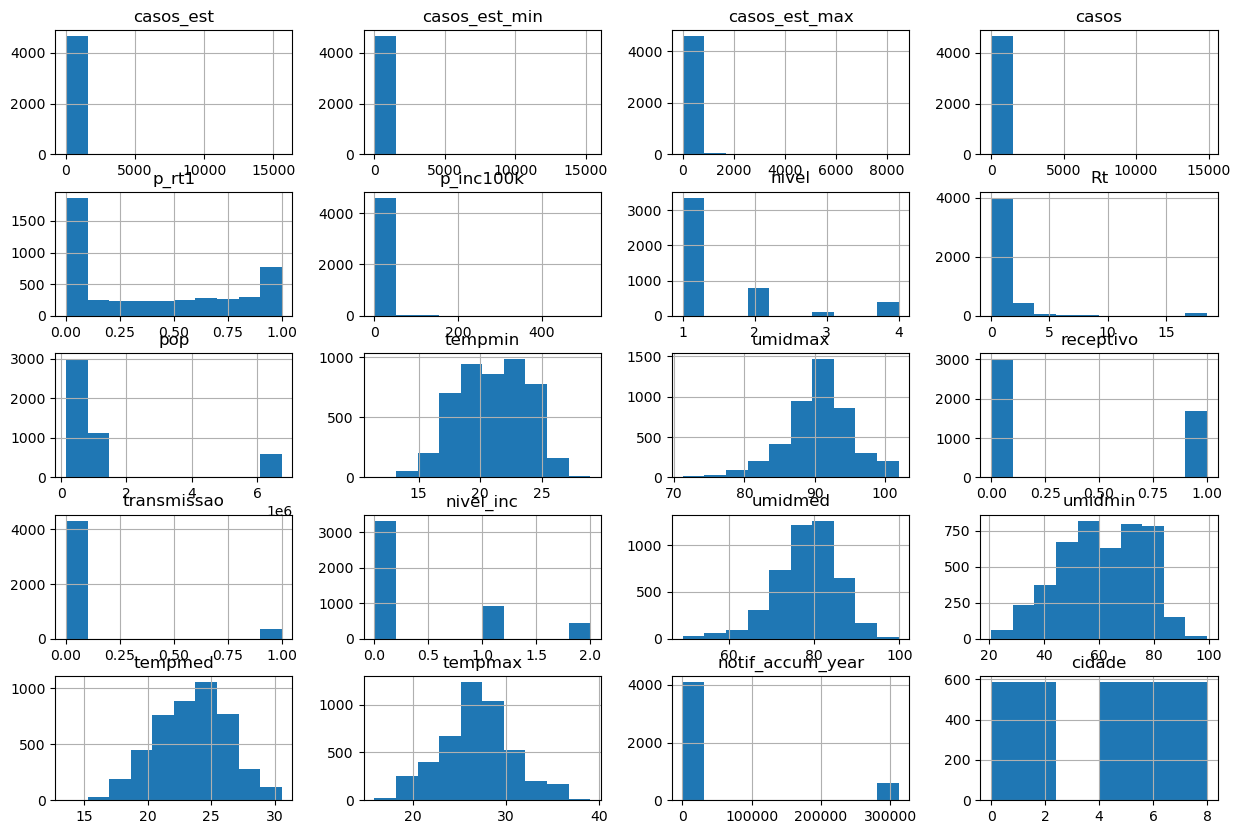

In [372]:
#Exibindo um histograma
df_dados_01.hist(figsize = (15,10))

In [373]:
#Transformando a coluna abaixo no formato datatime
df_dados_02['data_iniSE'] = pd.to_datetime(df_dados_02['data_iniSE'])

<AxesSubplot:>

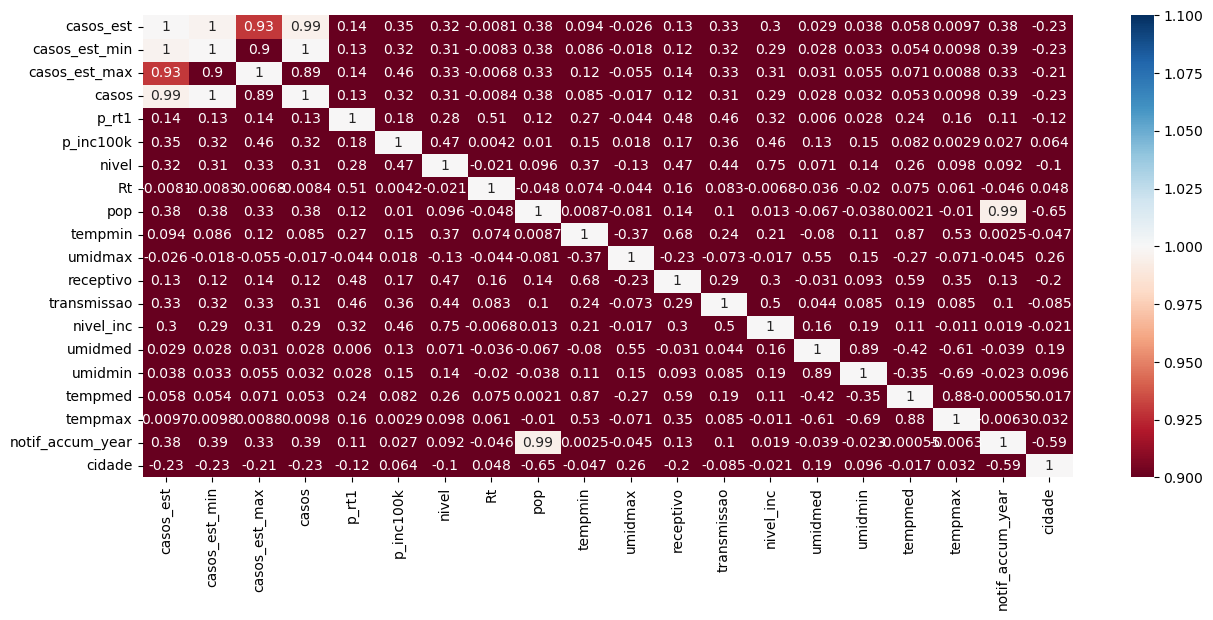

In [374]:
#Matriz de correlação com o seaborn

plt.figure(figsize = (15, 6))
sns.heatmap(df_dados_02.corr(), annot=True, cmap='RdBu', vmin=1, vmax=1)

In [375]:
#criando um dataframe com index como data ( Series temporais)

df_dados_03 = df_dados_02

#Setando o atributo 'data_iniSE' com indice para criar um serie temporal
df_dados_03.set_index('data_iniSE', inplace=True)

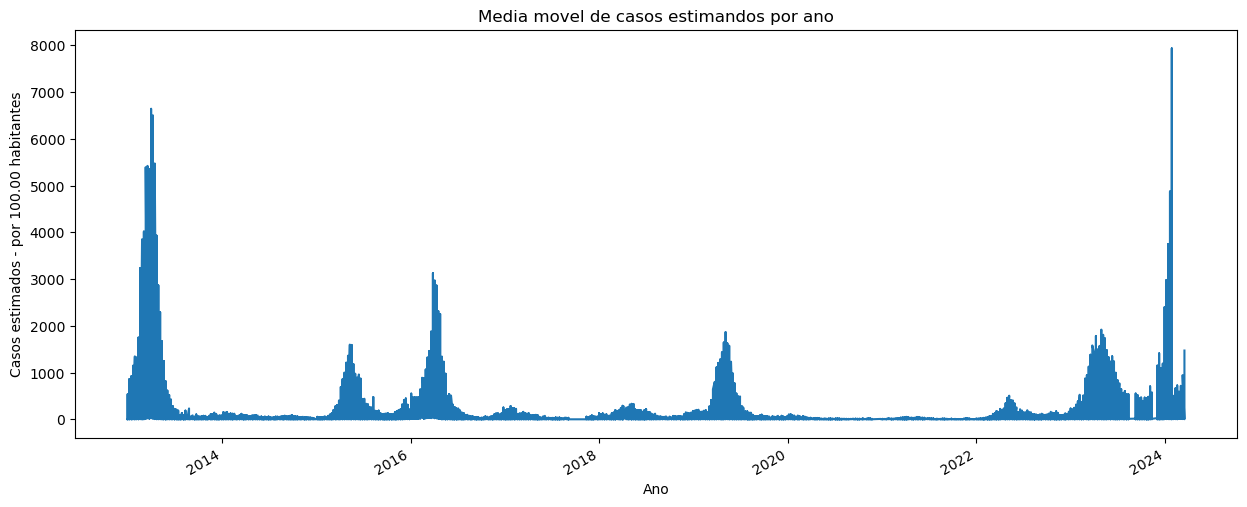

In [376]:
#1. Qual foi a média do número estimado de casos ao longo do ano?

#Organizando os valores da colunas em ordem descrescente
#df_dados_01['data_iniSE'] = df_dados_01['data_iniSE'].sort_values()

#Calculando a media e saltando por um index
df_dados_03.rolling(window=1).casos_est.mean().plot(figsize=(15,6))
plt.title('Media movel de casos estimandos por ano')
plt.xlabel('Ano')
plt.ylabel('Casos estimados - por 100.00 habitantes')
plt.show()
#Calculando a median a cada 7 dias
#df_dados_01['roll_median_avg,windos_7'] = df_dados_01.rolling(window='7d', on='data_iniSE').casos_est.mean()

#df_dados_01.head()


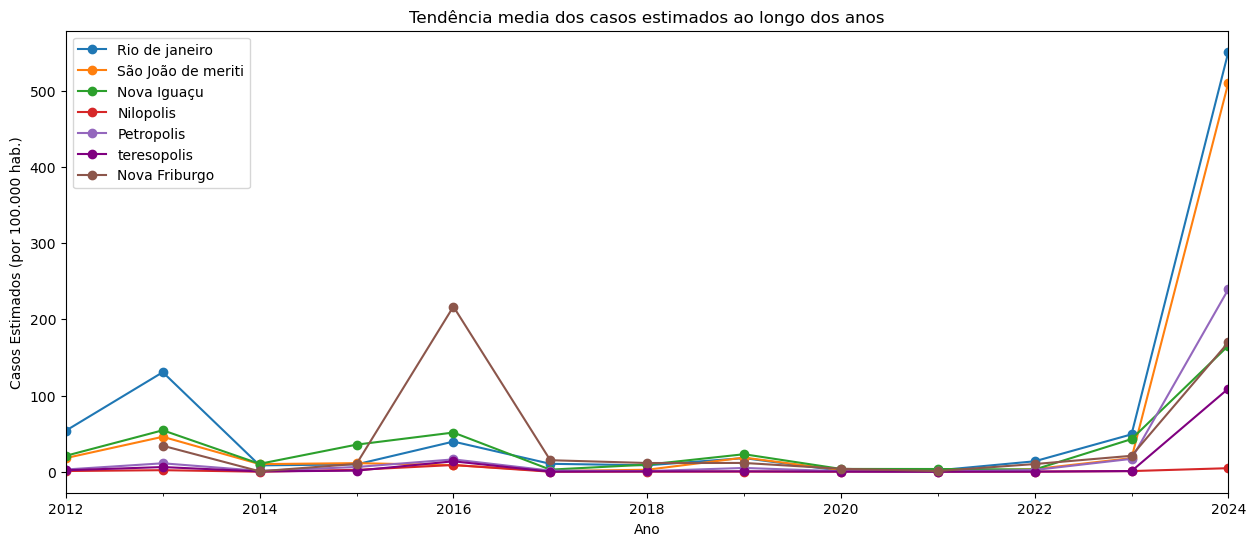

In [377]:
#5. Tendência observável na casos estimados ao longo dos anos separado por cidades:

#.resample('Y') -> especifica que a distruição é por ano (YEAR)
#.sum() realiza a soma dos valores
#kind='line' -> Especifica o tipo de grafico a ser plotado

#espeficiando a cidade utilizando um filtro 

#Rio de janeiro
df_filtro_cidade_00 = df_dados_03.cidade == 0

#Duque de caxias
df_filtro_cidade_01 = df_dados_03.cidade == 1

#São João de meriti
df_filtro_cidade_02 = df_dados_03.cidade == 2

#Niteroi
df_filtro_cidade_03 = df_dados_03.cidade == 3

#Nova iguaçu
df_filtro_cidade_04 = df_dados_03.cidade == 4

#Nilopolis
df_filtro_cidade_05 = df_dados_03.cidade == 5 

#Petropolis
df_filtro_cidade_06 = df_dados_03.cidade == 6

#Teresopolis
df_filtro_cidade_07 = df_dados_03.cidade == 7 

#Nova Friburgo
df_filtro_cidade_08 = df_dados_03.cidade == 8 
 
#plotando os grafica de cada cidade de forma independente 
df_dados_03[df_filtro_cidade_01].casos_est.resample('Y').mean().plot(kind='line',label= 'Rio de janeiro',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_02].casos_est.resample('Y').mean().plot(kind='line',label='São João de meriti',marker='o',figsize=(15,6))

#df_dados_03[df_filtro_cidade_03].casos_est.resample('Y').mean().plot(kind='line',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_04].casos_est.resample('Y').mean().plot(kind='line',label='Nova Iguaçu',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_05].casos_est.resample('Y').mean().plot(kind='line',label='Nilopolis',marker='o',figsize=(15,6))#

df_dados_03[df_filtro_cidade_06].casos_est.resample('Y').mean().plot(kind='line',label='Petropolis',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_07].casos_est.resample('Y').mean().plot(kind='line',label='teresopolis',color='purple',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_08].casos_est.resample('Y').mean().plot(kind='line',label='Nova Friburgo',marker='o',figsize=(15,6))



#df_dados_03['casos_est'].resample('Y').mean().plot(kind='line',marker='o',figsize=(15,6))
plt.title("Tendência media dos casos estimados ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Casos Estimados (por 100.000 hab.)")
plt.legend()
plt.show()

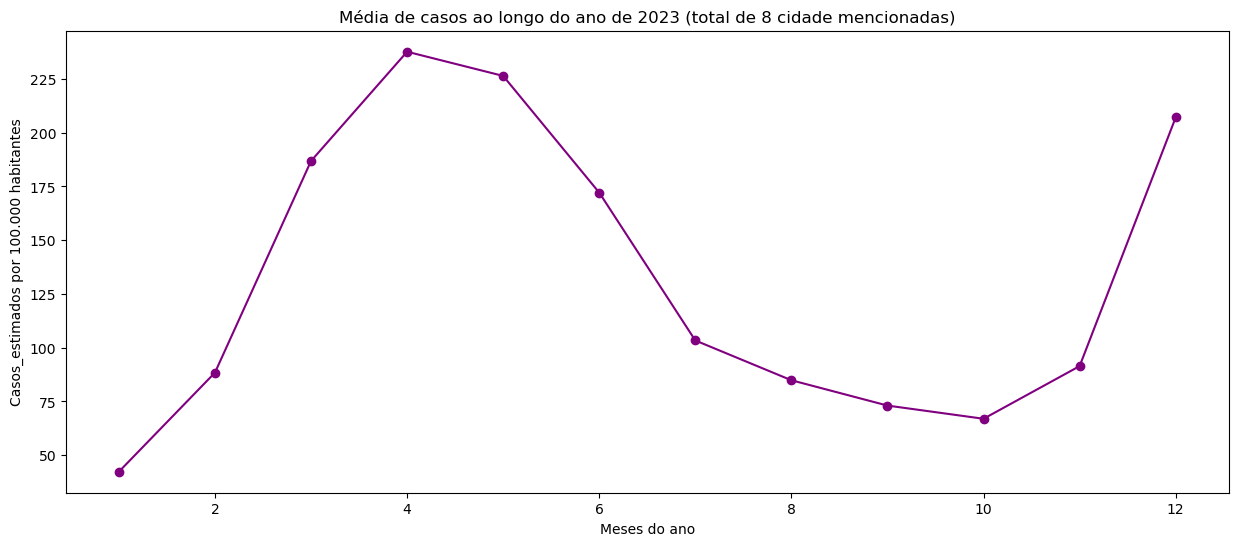

In [378]:
#1. Qual foi a média do número estimado de casos por mes ao longo do último ano?
#(casos por 100.000 habitantes)
#Filtrando pelo ano de 2023
filtro_2023 = df_dados_03.index.year == 2023
#Plotando o grafico
df_dados_03[filtro_2023].casos_est.groupby(df_dados_03[filtro_2023].index.month).mean().plot(kind='line',marker='o',color='purple',figsize=(15,6))
plt.title('Média de casos ao longo do ano de 2023 (total de 8 cidade mencionadas)')
plt.xlabel('Meses do ano')
plt.ylabel('Casos_estimados por 100.000 habitantes')
plt.show()

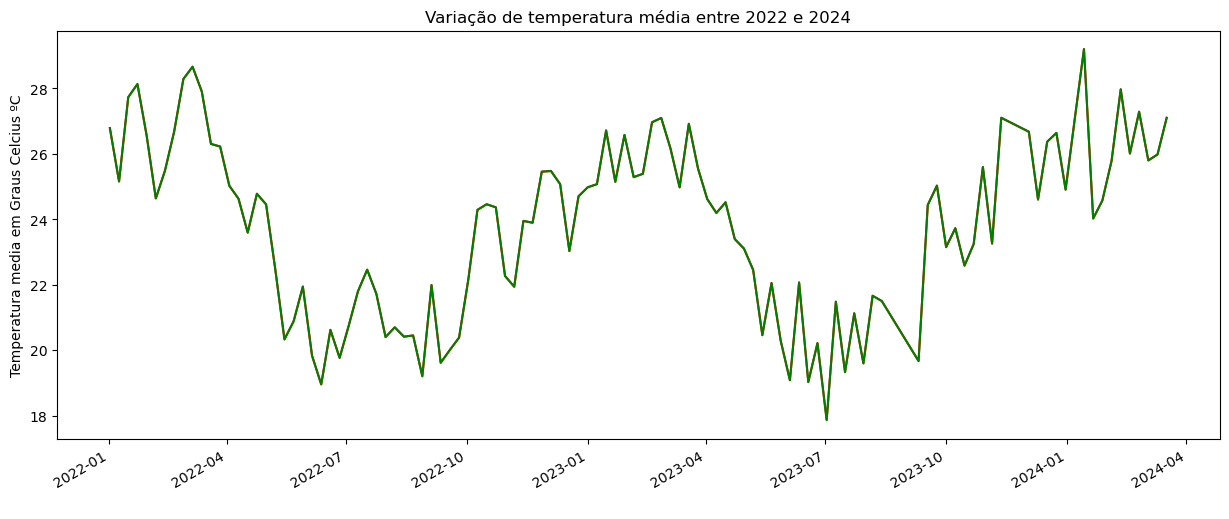

In [379]:
#1. Qual foi a média do número estimado de casos por ano ao longo dos dois ultimos anos.
#(casos por 100.000 habitantes)
#Filtrando pelo ano de 2023
filtro_2023_4 = (df_dados_03.index.year >= 2022) & (df_dados_03.cidade == 4) 
filtro_2023_2 = (df_dados_03.index.year >= 2022) & (df_dados_03.cidade == 2) 
#Plotando o graficok
df_dados_03[filtro_2023_4].rolling(window=1).tempmed.mean().plot(kind='line', color='red',figsize=(15,6))
df_dados_03[filtro_2023_2].rolling(window=1).tempmed.mean().plot(kind='line', color='green',figsize=(15,6))

plt.title('Variação de temperatura média entre 2022 e 2024')
#Defini os rótulos para os meses de 1 a 12
#ax.set_xticks(range(1,13))

#ax.set_xtickslabels([pd.Timestamp(2023, month,1).strtime('%b\n%Y') for month in range(1,13)], rotation=45)
plt.xlabel(' ')
plt.ylabel('Temperatura media em Graus Celcius ºC')
plt.show()

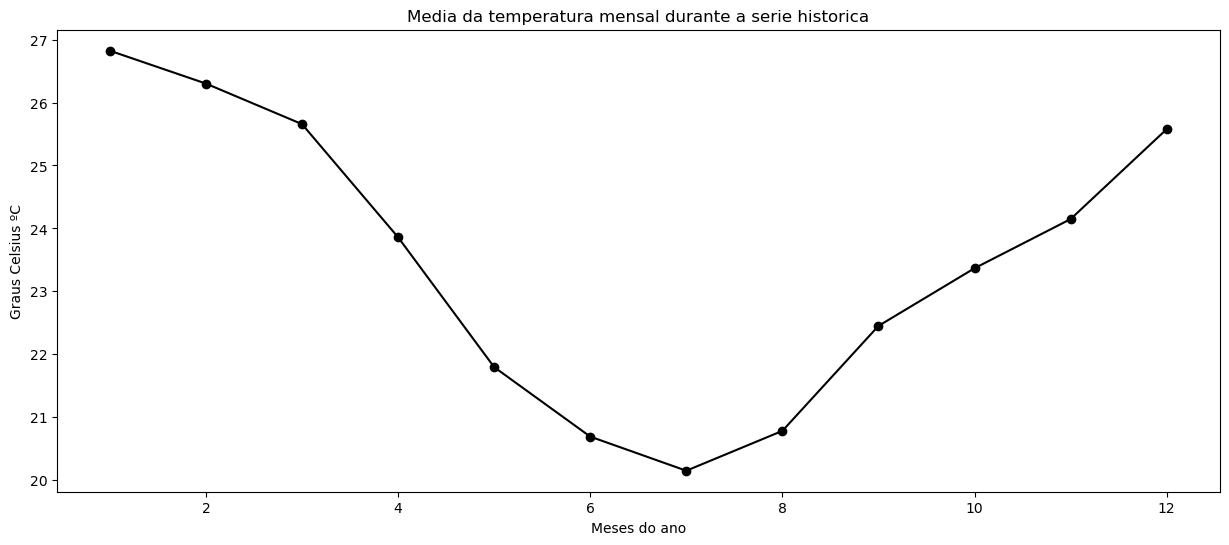

In [380]:
#Verificando a variação da temperatura

df_dados_03['tempmed'].groupby(df_dados_03.index.month).mean().plot(kind='line',marker='o',color='black',figsize=(15,6))
plt.title('Media da temperatura mensal durante a serie historica')
plt.xlabel('Meses do ano')
plt.ylabel('Graus Celsius ºC')
plt.show()

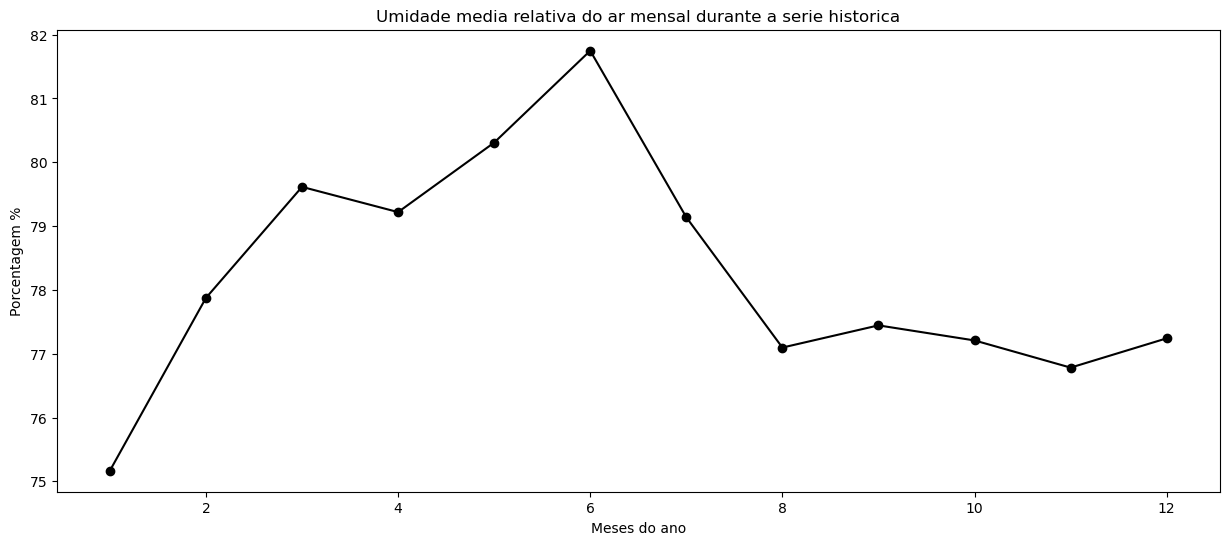

In [381]:
#Verificando a variação da umidade relativa do AR mensal

df_dados_03['umidmed'].groupby(df_dados_03.index.month).mean().plot(kind='line',marker='o',color='black',figsize=(15,6))
plt.title('Umidade media relativa do ar mensal durante a serie historica')
plt.xlabel('Meses do ano')
plt.ylabel('Porcentagem %')
plt.show()

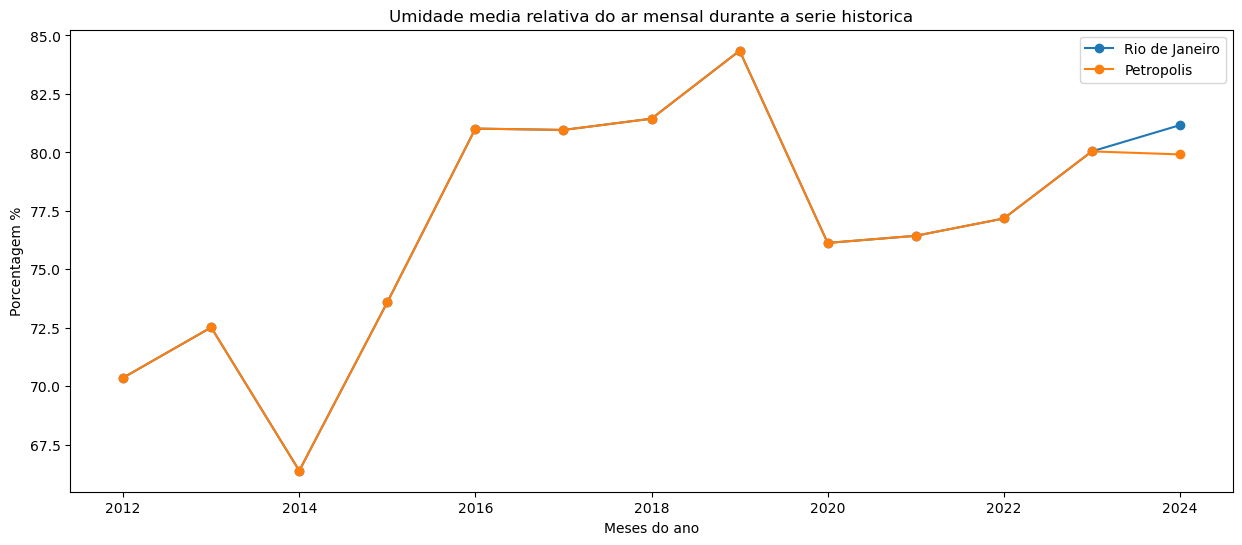

In [382]:
#Verificando a variação da temperatura

#Rio de janeiro
df_filtro_cidade_00 = df_dados_03.cidade == 0

#Duque de caxias
df_filtro_cidade_01 = df_dados_03.cidade == 1

#São João de meriti
df_filtro_cidade_02 = df_dados_03.cidade == 2

#Niteroi
df_filtro_cidade_03 = df_dados_03.cidade == 3

#Nova iguaçu
df_filtro_cidade_04 = df_dados_03.cidade == 4

#Nilopolis
df_filtro_cidade_05 = df_dados_03.cidade == 5 

#Petropolis
df_filtro_cidade_06 = df_dados_03.cidade == 6

#Teresopolis
df_filtro_cidade_07 = df_dados_03.cidade == 7 

#Nova Friburgo
df_filtro_cidade_08 = df_dados_03.cidade == 8 

df_dados_03[df_filtro_cidade_00].umidmed.groupby(df_dados_03[df_filtro_cidade_00].index.year).mean().plot(kind='line',marker='o',label='Rio de Janeiro',figsize=(15,6))

#df_dados_03[df_filtro_cidade_01].umidmed.groupby(df_dados_03[df_filtro_cidade_01].index.year).mean().plot(kind='line',marker='o',label='Duque de Caxias',figsize=(15,6))

#df_dados_03[df_filtro_cidade_02].umidmed.groupby(df_dados_03[df_filtro_cidade_02].index.year).mean().plot(kind='line',marker='o',label='São João de Meriti',figsize=(15,6))

#df_dados_03[df_filtro_cidade_03].umidmed.groupby(df_dados_03[df_filtro_cidade_03].index.year).mean().plot(kind='line',marker='o',figsize=(15,6))

#df_dados_03[df_filtro_cidade_04].umidmed.groupby(df_dados_03[df_filtro_cidade_04].index.year).mean().plot(kind='line',marker='o',figsize=(15,6))

#df_dados_03[df_filtro_cidade_05].umidmed.groupby(df_dados_03[df_filtro_cidade_05].index.year).mean().plot(kind='line',marker='o',figsize=(15,6))

df_dados_03[df_filtro_cidade_06].umidmed.groupby(df_dados_03[df_filtro_cidade_06].index.year).mean().plot(kind='line',label='Petropolis',marker='o',figsize=(15,6))

#df_dados_03[df_filtro_cidade_07].umidmed.groupby(df_dados_03[df_filtro_cidade_07].index.year).mean().plot(kind='line',marker='o',figsize=(15,6))

#df_dados_03[df_filtro_cidade_08].umidmed.groupby(df_dados_03[df_filtro_cidade_08].index.year).mean().plot(kind='line',marker='o',figsize=(15,6))

plt.title('Umidade media relativa do ar mensal durante a serie historica')
plt.xlabel('Meses do ano')
plt.ylabel('Porcentagem %')
plt.legend()
plt.show()

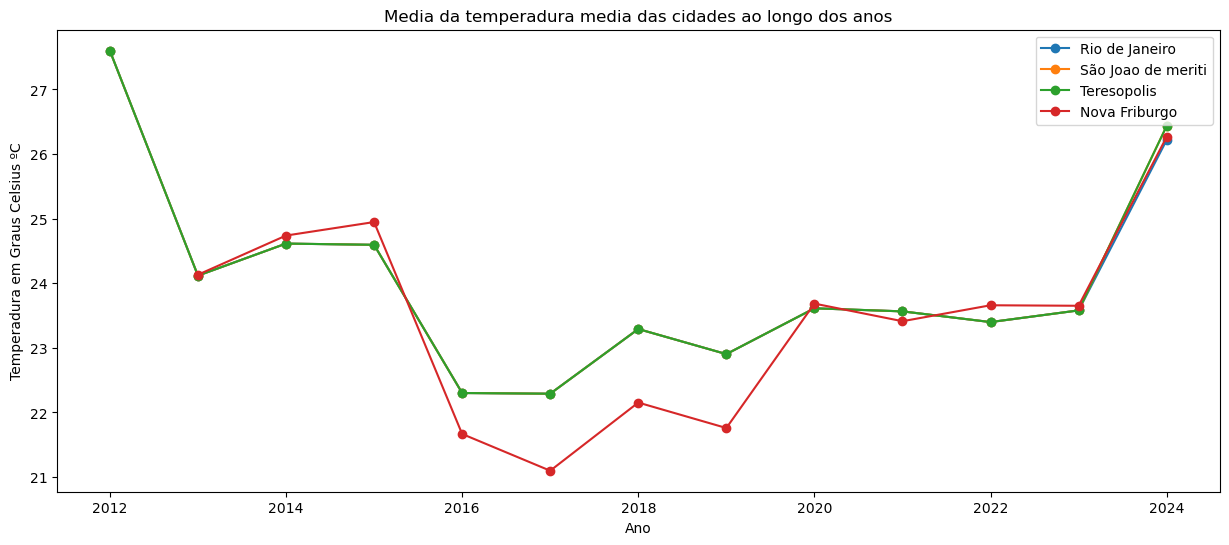

In [383]:
#Plotar graficos de dispersão para mostrar a correlação


#filtrar_riodejaneiro = df_dados_03.cidade == 0

#df_dados_03[filtrar_riodejaneiro].tempmed
#plt.plot(df_dados_03.index.year, df_dados_03['tempmed'], label='te', color='Blue')
#plt.plot(df_dados_03.index.year, df_dados_03['casos_est'], label='tr', color='Red')

#espeficiando a cidade utilizando um filtro 

#Rio de janeiro
df_filtro_cidade_00 = df_dados_03.cidade == 0

#Duque de caxias
df_filtro_cidade_01 = df_dados_03.cidade == 1

#São João de meriti
df_filtro_cidade_02 = df_dados_03.cidade == 2

#Niteroi
df_filtro_cidade_03 = df_dados_03.cidade == 3

#Nova iguaçu
df_filtro_cidade_04 = df_dados_03.cidade == 4

#Nilopolis
df_filtro_cidade_05 = df_dados_03.cidade == 5 

#Petropolis
df_filtro_cidade_06 = df_dados_03.cidade == 6

#Teresopolis
df_filtro_cidade_07 = df_dados_03.cidade == 7 

#Nova Friburgo
df_filtro_cidade_08 = df_dados_03.cidade == 8 

#plotando os graficos 

df_dados_03[df_filtro_cidade_00].tempmed.groupby(df_dados_03[df_filtro_cidade_00].index.year).mean().plot(kind='line',marker='o',label='Rio de Janeiro',figsize=(15,6))

#df_dados_03[df_filtro_cidade_01].tempmed.groupby(df_dados_03[df_filtro_cidade_01].index.year).mean().plot(kind='line',marker='o',label='Duque de Caxias',figsize=(15,6))

df_dados_03[df_filtro_cidade_02].tempmed.groupby(df_dados_03[df_filtro_cidade_02].index.year).mean().plot(kind='line',marker='o',label='São Joao de meriti',figsize=(15,6))

#df_dados_03[df_filtro_cidade_03].tempmed.groupby(df_dados_03[df_filtro_cidade_03].index.year).mean().plot(kind='line',marker='o',label='Niteroi',figsize=(15,6))

#df_dados_03[df_filtro_cidade_04].tempmed.groupby(df_dados_03[df_filtro_cidade_04].index.year).mean().plot(kind='line',marker='o',label='Nova iguacu',figsize=(15,6))

#df_dados_03[df_filtro_cidade_05].tempmed.groupby(df_dados_03[df_filtro_cidade_05].index.year).mean().plot(kind='line',marker='o',label='Nilopolis',figsize=(15,6))

#df_dados_03[df_filtro_cidade_06].tempmed.groupby(df_dados_03[df_filtro_cidade_06].index.year).mean().plot(kind='line',marker='o',label='Petropolis',figsize=(15,6))

df_dados_03[df_filtro_cidade_07].tempmed.groupby(df_dados_03[df_filtro_cidade_07].index.year).mean().plot(kind='line',marker='o',label='Teresopolis',figsize=(15,6))

df_dados_03[df_filtro_cidade_08].tempmed.groupby(df_dados_03[df_filtro_cidade_08].index.year).mean().plot(kind='line',marker='o',label='Nova Friburgo',figsize=(15,6))

#Configurações dos graficos 
plt.title('Media da temperadura media das cidades ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Temperadura em Graus Celsius ºC')
plt.legend()
plt.show()

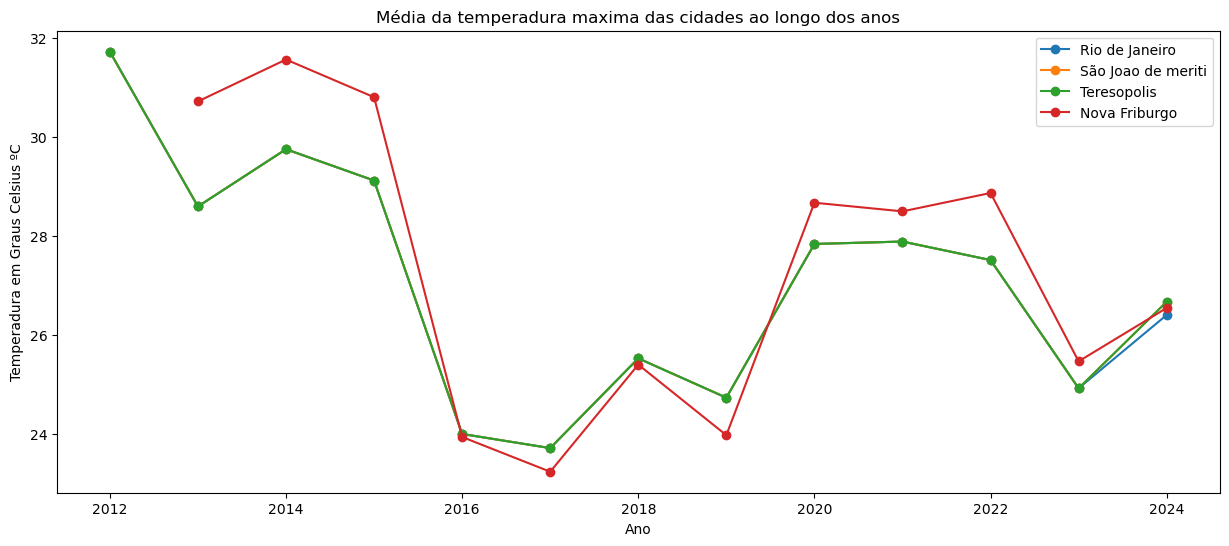

In [384]:
#Plotar graficos de dispersão para mostrar a correlação


#filtrar_riodejaneiro = df_dados_03.cidade == 0

#df_dados_03[filtrar_riodejaneiro].tempmed
#plt.plot(df_dados_03.index.year, df_dados_03['tempmed'], label='te', color='Blue')
#plt.plot(df_dados_03.index.year, df_dados_03['casos_est'], label='tr', color='Red')

#espeficiando a cidade utilizando um filtro 

#Rio de janeiro
df_filtro_cidade_00 = df_dados_03.cidade == 0

#Duque de caxias
df_filtro_cidade_01 = df_dados_03.cidade == 1

#São João de meriti
df_filtro_cidade_02 = df_dados_03.cidade == 2

#Niteroi
df_filtro_cidade_03 = df_dados_03.cidade == 3

#Nova iguaçu
df_filtro_cidade_04 = df_dados_03.cidade == 4

#Nilopolis
df_filtro_cidade_05 = df_dados_03.cidade == 5 

#Petropolis
df_filtro_cidade_06 = df_dados_03.cidade == 6

#Teresopolis
df_filtro_cidade_07 = df_dados_03.cidade == 7 

#Nova Friburgo
df_filtro_cidade_08 = df_dados_03.cidade == 8 

#plotando os graficos 

df_dados_03[df_filtro_cidade_00].tempmax.groupby(df_dados_03[df_filtro_cidade_00].index.year).mean().plot(kind='line',marker='o',label='Rio de Janeiro',figsize=(15,6))

#df_dados_03[df_filtro_cidade_01].tempmax.groupby(df_dados_03[df_filtro_cidade_01].index.year).mean().plot(kind='line',marker='o',label='Duque de Caxias',figsize=(15,6))

df_dados_03[df_filtro_cidade_02].tempmax.groupby(df_dados_03[df_filtro_cidade_02].index.year).mean().plot(kind='line',marker='o',label='São Joao de meriti',figsize=(15,6))

#df_dados_03[df_filtro_cidade_03].tempmax.groupby(df_dados_03[df_filtro_cidade_03].index.year).mean().plot(kind='line',marker='o',label='Niteroi',figsize=(15,6))

#df_dados_03[df_filtro_cidade_04].tempmax.groupby(df_dados_03[df_filtro_cidade_04].index.year).mean().plot(kind='line',marker='o',label='Nova iguacu',figsize=(15,6))

#df_dados_03[df_filtro_cidade_05].tempmax.groupby(df_dados_03[df_filtro_cidade_05].index.year).mean().plot(kind='line',marker='o',label='Nilopolis',figsize=(15,6))

#df_dados_03[df_filtro_cidade_06].tempmax.groupby(df_dados_03[df_filtro_cidade_06].index.year).mean().plot(kind='line',marker='o',label='Petropolis',figsize=(15,6))

df_dados_03[df_filtro_cidade_07].tempmax.groupby(df_dados_03[df_filtro_cidade_07].index.year).mean().plot(kind='line',marker='o',label='Teresopolis',figsize=(15,6))

df_dados_03[df_filtro_cidade_08].tempmax.groupby(df_dados_03[df_filtro_cidade_08].index.year).mean().plot(kind='line',marker='o',label='Nova Friburgo',figsize=(15,6))

#Configurações dos graficos 
plt.title('Média da temperadura maxima das cidades ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Temperadura em Graus Celsius ºC')
plt.legend()
plt.show()

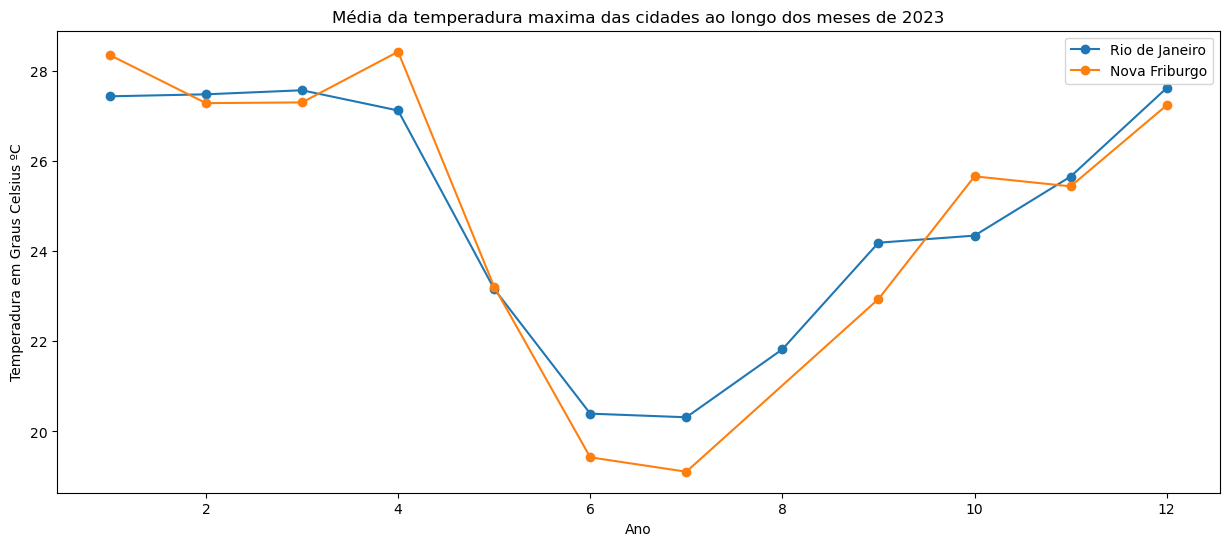

In [385]:
# Plotando graficos com a media da temperatura maxima 


#filtrar_riodejaneiro = df_dados_03.cidade == 0

#df_dados_03[filtrar_riodejaneiro].tempmed
#plt.plot(df_dados_03.index.year, df_dados_03['tempmed'], label='te', color='Blue')
#plt.plot(df_dados_03.index.year, df_dados_03['casos_est'], label='tr', color='Red')

#espeficiando a cidade utilizando um filtro 

#Rio de janeiro
filtro_2023_cid_0 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 0)

#Duque de caxias
filtro_2023_cid_1 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 1)

#São Joao de meriti
filtro_2023_cid_2 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 2)

#Niteroi
filtro_2023_cid_3 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 3)

#Nova Iguaçu
filtro_2023_cid_4 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 4)

#Nilopolis
filtro_2023_cid_5 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 5)

#Petropolis
filtro_2023_cid_6 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 6)

#Teresopolis
filtro_2023_cid_7 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 7)

#Nova Friburgo
filtro_2023_cid_8 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 8)

#plotando os graficos 

df_dados_03[filtro_2023_cid_0].tempmax.groupby(df_dados_03[filtro_2023_cid_0].index.month).mean().plot(kind='line',marker='o',label='Rio de Janeiro',figsize=(15,6))

#df_dados_03[df_filtro_cidade_01].tempmax.groupby(df_dados_03[df_filtro_cidade_01].index.month).mean().plot(kind='line',marker='o',label='Duque de Caxias',figsize=(15,6))

#df_dados_03[filtro_2023_cid_2].tempmax.groupby(df_dados_03[filtro_2023_cid_2].index.month).mean().plot(kind='line',marker='o',label='São Joao de meriti',figsize=(15,6))

#df_dados_03[df_filtro_cidade_03].tempmax.groupby(df_dados_03[df_filtro_cidade_03].index.month).mean().plot(kind='line',marker='o',label='Niteroi',figsize=(15,6))

#df_dados_03[df_filtro_cidade_04].tempmax.groupby(df_dados_03[df_filtro_cidade_04].index.month).mean().plot(kind='line',marker='o',label='Nova iguacu',figsize=(15,6))

#df_dados_03[df_filtro_cidade_05].tempmax.groupby(df_dados_03[df_filtro_cidade_05].index.month).mean().plot(kind='line',marker='o',label='Nilopolis',figsize=(15,6))

#df_dados_03[filtro_2023_cid_6].tempmax.groupby(df_dados_03[filtro_2023_cid_6].index.month).mean().plot(kind='line',marker='o',label='Petropolis',figsize=(15,6))

#df_dados_03[df_filtro_cidade_07].tempmax.groupby(df_dados_03[df_filtro_cidade_07].index.month).mean().plot(kind='line',marker='o',label='Teresopolis',figsize=(15,6))

df_dados_03[filtro_2023_cid_8].tempmax.groupby(df_dados_03[filtro_2023_cid_8].index.month).mean().plot(kind='line',marker='o',label='Nova Friburgo',figsize=(15,6))

#Configurações dos graficos 
plt.title('Média da temperadura maxima das cidades ao longo dos meses de 2023')
plt.xlabel('Ano')
plt.ylabel('Temperadura em Graus Celsius ºC')
plt.legend()
plt.show()

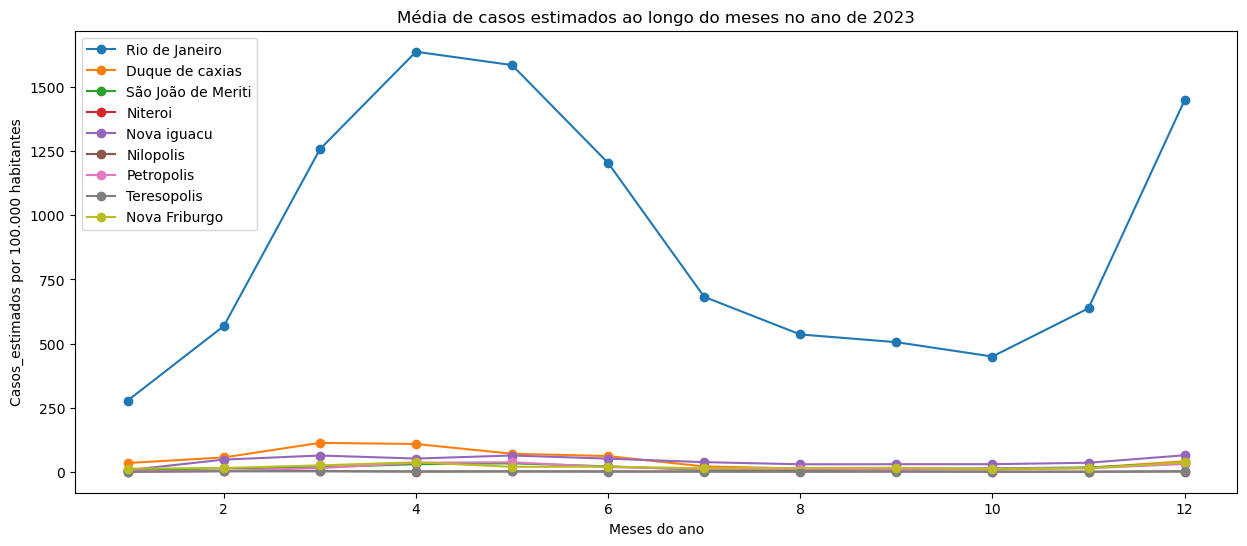

In [386]:
#1. Qual foi a média do número estimado de casos por mes ao longo do último ano?
#(casos por 100.000 habitantes)

#Filtrando pelo ano de 2023 e pela cidade especifica

#Rio de janeiro
filtro_2023_cid_0 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 0)

#Duque de caxias
filtro_2023_cid_1 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 1)

#São Joao de meriti
filtro_2023_cid_2 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 2)

#Niteroi
filtro_2023_cid_3 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 3)

#Nova Iguaçu
filtro_2023_cid_4 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 4)

#Nilopolis
filtro_2023_cid_5 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 5)

#Petropolis
filtro_2023_cid_6 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 6)

#Teresopolis
filtro_2023_cid_7 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 7)

#Nova Friburgo
filtro_2023_cid_8 = (df_dados_03.index.year == 2023) & (df_dados_03.cidade == 8)


#Plotando os graficos de cada cidade de forma individual 
df_dados_03[filtro_2023_cid_0].casos_est.groupby(df_dados_03[filtro_2023_cid_0].index.month).mean().plot(kind='line',marker='o',label='Rio de Janeiro',figsize=(15,6))

df_dados_03[filtro_2023_cid_1].casos_est.groupby(df_dados_03[filtro_2023_cid_1].index.month).mean().plot(kind='line',marker='o',label='Duque de caxias',figsize=(15,6))

df_dados_03[filtro_2023_cid_2].casos_est.groupby(df_dados_03[filtro_2023_cid_2].index.month).mean().plot(kind='line',marker='o',label='São João de Meriti',figsize=(15,6))

df_dados_03[filtro_2023_cid_3].casos_est.groupby(df_dados_03[filtro_2023_cid_3].index.month).mean().plot(kind='line',marker='o',label='Niteroi',figsize=(15,6))

df_dados_03[filtro_2023_cid_4].casos_est.groupby(df_dados_03[filtro_2023_cid_4].index.month).mean().plot(kind='line',marker='o',label='Nova iguacu',figsize=(15,6))

df_dados_03[filtro_2023_cid_5].casos_est.groupby(df_dados_03[filtro_2023_cid_5].index.month).mean().plot(kind='line',marker='o',label='Nilopolis',figsize=(15,6))

df_dados_03[filtro_2023_cid_6].casos_est.groupby(df_dados_03[filtro_2023_cid_6].index.month).mean().plot(kind='line',marker='o',label='Petropolis',figsize=(15,6))

df_dados_03[filtro_2023_cid_7].casos_est.groupby(df_dados_03[filtro_2023_cid_7].index.month).mean().plot(kind='line',marker='o',label='Teresopolis',figsize=(15,6))

df_dados_03[filtro_2023_cid_8].casos_est.groupby(df_dados_03[filtro_2023_cid_8].index.month).mean().plot(kind='line',marker='o',label='Nova Friburgo',figsize=(15,6))



plt.title('Média de casos estimados ao longo do meses no ano de 2023')
plt.xlabel('Meses do ano')
plt.ylabel('Casos_estimados por 100.000 habitantes')
plt.legend()
plt.show()